In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [8]:
csv_path = "C:/Users/chuck/OneDrive/Desktop/Honors/propper_datasets/slim_dataset.csv"
# csv_path = "C:/Users/chuck/OneDrive/Desktop/filtered_df.csv"
# csv_path = "C:/Users/chuck/OneDrive/Desktop/Honors/multi-class-dataset(save_point)/multi-class-dataset-new/labelsCracks.csv"
df = pd.read_csv(csv_path)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
# df = df.drop(columns=("finger_fault"))
print(df)

           image_name  good  crack  corrossion
0         image_0.jpg  0.33   0.00        0.66
1         image_1.jpg  0.33   0.00        0.66
2         image_3.jpg  0.33   0.00        0.66
3         image_4.jpg  0.33   0.00        0.66
4         image_5.jpg  0.66   0.00        0.33
...               ...   ...    ...         ...
5289  2_image_993.jpg  0.33   0.66        0.00
5290  0_image_994.jpg  0.66   0.33        0.00
5291  1_image_994.jpg  0.66   0.33        0.00
5292  2_image_994.jpg  0.66   0.33        0.00
5293  2_image_998.jpg  1.00   0.00        0.00

[5294 rows x 4 columns]


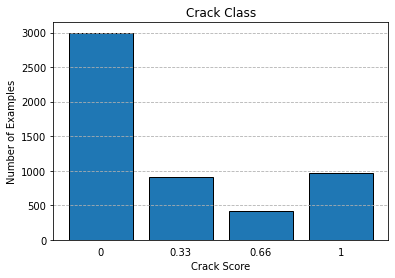

In [3]:
# Extracting 'crack' column data
crack_values = df['crack'].values

# Defining the bin edges
bin_edges = np.linspace(0, 1, num=5)  # Adjust 'num' to change the number of bins
# Adding a grid
plt.grid(axis='y', linestyle='--')
# Creating bar plot
plt.bar(range(len(bin_edges) - 1), np.histogram(crack_values, bins=bin_edges)[0], edgecolor='black', linewidth=1)

# Axis labels
plt.xlabel('Crack Score')
plt.ylabel('Number of Examples')

# Title
plt.title('Crack Class')

# Labeling each bin
bin_labels = ['0', '0.33', '0.66', '1']
plt.xticks(range(len(bin_labels)), bin_labels)

# Removing x-axis ticks
plt.tick_params(axis='x', which='both', bottom=False, top=False)
# Display the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


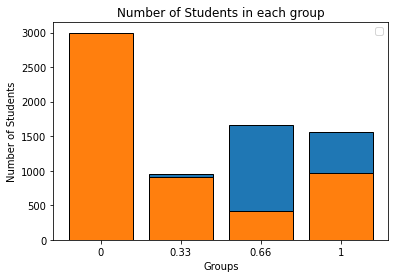

In [4]:

import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['0','0.33','0.66','1']
good_values = df['good'].values
crack_values = df['crack'].values
corrosion_values = df['corrossion'].values
  
bin_edges = np.linspace(0, 1, num=5)  # Adjust 'num' to change the number of bins
plt.bar(range(len(bin_edges) - 1), np.histogram(good_values, bins=bin_edges)[0], edgecolor='black', linewidth=1)
plt.bar(range(len(bin_edges) - 1), np.histogram(crack_values, bins=bin_edges)[0], edgecolor='black', linewidth=1)
  
bin_labels = ['0', '0.33', '0.66', '1']
plt.xticks(range(len(bin_labels)), bin_labels)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.show()

In [5]:
good_0_values = df['good_0.0'].values
good_33_values = df['good_0.33'].values
good_66_values = df['good_0.66'].values
good_1_values = df['good_1.0'].values


KeyError: 'good_0.0'

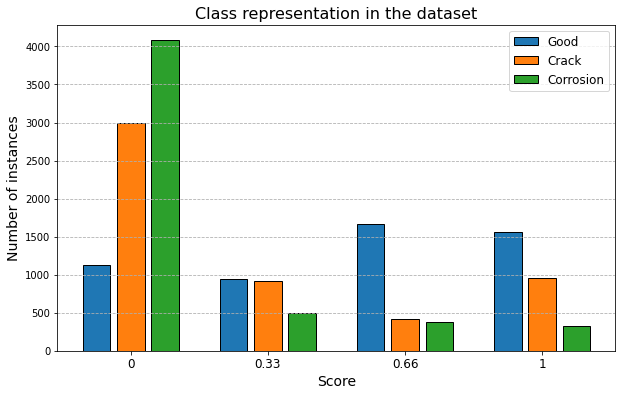

In [6]:
good_values = df['good'].values
crack_values = df['crack'].values
corrosion_values = df['corrossion'].values
bin_edges = np.linspace(0, 1, num=5)  # Adjust 'num' to change the number of bins

# Calculate the histograms for good_values, crack_values, and corrosion_values
good_hist = np.histogram(good_values, bins=bin_edges)[0]
crack_hist = np.histogram(crack_values, bins=bin_edges)[0]
corrosion_hist = np.histogram(corrosion_values, bins=bin_edges)[0]

bar_width = 0.2  # Width of the bars
bar_spacing = 0.05  # Spacing between the groups

# Create the x-axis values for the bars
x = np.arange(len(bin_labels))
# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the width and height as needed

# Plot the bars for good_values
ax.bar(x - bar_width - bar_spacing, good_hist, width=bar_width, edgecolor='black', linewidth=1, label='Good')

# Plot the bars for crack_values
ax.bar(x, crack_hist, width=bar_width, edgecolor='black', linewidth=1, label='Crack')
ax.grid(axis='y', linestyle='--')
# Plot the bars for corrosion_values
ax.bar(x + bar_width + bar_spacing, corrosion_hist, width=bar_width, edgecolor='black', linewidth=1, label='Corrosion')

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(bin_labels, fontsize=12)

plt.xlabel("Score", fontsize=14)
plt.ylabel("Number of instances", fontsize=14)
plt.title("Class representation in the dataset", fontsize=16)
plt.legend(fontsize=12)
# Save the plot as a JPEG file
plt.savefig('bar_plot_unbalanced.jpg', format='jpeg', dpi=600)
plt.show()

In [18]:
plt.savefig("Class-representation.jpg") #save as jpg

<Figure size 432x288 with 0 Axes>

[[1128, 948, 1660, 1558], [2998, 916, 420, 960], [4082, 496, 384, 332]]


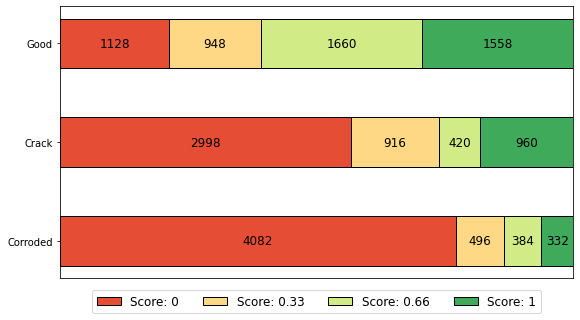

In [10]:
# Example usage:

from collections import Counter
class_labels = ['Score: 0', 'Score: 0.33', 'Score: 0.66', 'Score: 1']
good_count = Counter(list(df["good"].values))
crack_count = Counter(list(df["crack"].values))
corrosion_count = Counter(list(df["corrossion"].values))
class_count_list = [
    [good_count[0], good_count[0.33], good_count[0.66], good_count[1]],
    [crack_count[0], crack_count[0.33], crack_count[0.66], crack_count[1]],
    [corrosion_count[0], corrosion_count[0.33], corrosion_count[0.66], corrosion_count[1]]
]
print(class_count_list)

category_names = ['Score: 0', 'Score: 0.33', 'Score: 0.66', 'Score: 1']
results = {
    'Good': class_count_list[0],
    'Crack': class_count_list[1],
    'Corroded': class_count_list[2],
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color, edgecolor='black')

        ax.bar_label(rects, label_type='center', color='black', fontsize='large')

    ax.legend(ncol = 4, loc='lower center', fontsize='large',  bbox_to_anchor=(0.5, -0.15))

    return fig, ax

survey(results, category_names)
plt.savefig('bar_plot_classes_unbalance.jpg', format='jpeg', dpi=600)
plt.show()

## Normalised classes

In [2]:
csv_path_good = "C:/Users/chuck/OneDrive/Desktop/plane_onehot/balanced_good_df_encoded.csv"
csv_path_crack = "C:/Users/chuck/OneDrive/Desktop/plane_onehot/balanced_crack_df_encoded.csv"
csv_path_corrosion = "C:/Users/chuck/OneDrive/Desktop/plane_onehot/balanced_corrossion_df_encoded.csv"
df_good = pd.read_csv(csv_path_good)
df_crack = pd.read_csv(csv_path_crack)
df_corrosion = pd.read_csv(csv_path_corrosion)
df_good = df_good.loc[:, ~df_good.columns.str.contains('^Unnamed')]
df_crack = df_crack.loc[:, ~df_crack.columns.str.contains('^Unnamed')]
df_corrosion = df_corrosion.loc[:, ~df_corrosion.columns.str.contains('^Unnamed')]
# df = df.drop(columns=("finger_fault"))
print(df_good)
print(len(df_good))

pd.read_csv

            image_name  good_0.0  good_0.33  good_0.66  good_1.0
0          image_0.jpg         0          1          0         0
1          image_1.jpg         0          1          0         0
2          image_2.jpg         0          0          0         1
3          image_3.jpg         0          1          0         0
4          image_4.jpg         0          1          0         0
...                ...       ...        ...        ...       ...
2991  1_image_2472.jpg         0          0          0         1
2992  2_image_2472.jpg         0          0          0         1
2993  0_image_2473.jpg         0          0          0         1
2994  1_image_2473.jpg         0          0          0         1
2995  2_image_2473.jpg         0          0          0         1

[2996 rows x 5 columns]
2996


<function pandas.io.parsers.readers.read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', sep=<no_default>, delimiter=None, header='infer', names=<no_default>, index_col=None, usecols=None, squeeze=None, prefix=<no_default>, mangle_dupe_cols=True, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=None, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression: 'CompressionOptions' = 'infer', thousands=None, decimal: 'str' = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors: 'str | None' = 'strict', dialect=None, error_bad_lines=None, warn_bad_lines=Non

In [3]:
def summarise_onehot_classes(df):
    class_nums = []
    for i, column in enumerate(df):
        class_nums.append(df[column].value_counts()[1])

    return class_nums[1:]

good_class_nums = summarise_onehot_classes(df_good)
print(good_class_nums)
corrosion_class_nums = summarise_onehot_classes(df_corrosion)
crack_class_nums = summarise_onehot_classes(df_crack)

[792, 624, 776, 804]


In [4]:
good_class_nums = [100*num/len(df_good) for num in good_class_nums]
crack_class_nums = [100*num/len(df_crack) for num in crack_class_nums]
corrosion_class_nums = [100*num/len(df_corrosion) for num in corrosion_class_nums]
print(good_class_nums)


[26.43524699599466, 20.827770360480642, 25.901201602136183, 26.83578104138852]


In [16]:
%matplotlib qt
import matplotlib.patheffects as path_effects


fig = plt.figure()
ax = plt.subplot(111)

colours = [
    (204, 0, 0),
    (255, 100, 0), 
    (100, 204, 51),
    (0, 102, 0),
]
colours = [(r/255, g/255, b/255) for r, g, b in colours]
font1 = {'family': 'georgia', 'size': 20}
font2 = {'family': 'georgia', 'size': 16}

type = ["Good", "Crack", "Corrosion"]
bars = []
for i in range(len(good_class_nums)):
    bars.append([good_class_nums[i], crack_class_nums[i], corrosion_class_nums[i]])

b1 = ax.barh(type, bars[0], color=colours[0], edgecolor='k')
b2 = ax.barh(type, bars[1], left=bars[0], color=colours[1], edgecolor='k')
b3 = ax.barh(type, bars[2], left=[b1 + b2 for b1, b2 in zip(bars[0], bars[1])], color=colours[2], edgecolor='k')
b4 = ax.barh(type, bars[3], left=[b1 + b2 + b3 for b1, b2, b3 in zip(bars[0], bars[1], bars[2])], color=colours[3], edgecolor='k')

# Add text labels to each section of the bar
text_effect = [path_effects.withStroke(linewidth=3, foreground='black')]
prev = [0]*len(bars)
for bar in bars:
    for i in range(len(bar)):
        ax.text(prev[i]+(bar[i])/2, type[i], str(round(bar[i],1)) + " %", va='center', ha='center', color=(1,1,1),fontdict=font2, path_effects=text_effect)
        prev[i] = prev[i] + bar[i]
        print(prev[i])

plt.yticks(fontname='Georgia', fontsize=20)
plt.xticks(fontname='Georgia', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlabel('Percent of dataset', fontdict=font1)

legend = ax.legend([b1, b2, b3, b4], ["0", "0.33", "0.66", "1"], title="Score", prop=font2, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(bars), shadow=True)
legend.get_title().set_fontproperties(font2)
plt.show()
plt.savefig("output.png", bbox_inches="tight")

26.43524699599466
29.27400468384075
29.205607476635514
47.2630173564753
57.61124121779859
58.177570093457945
73.16421895861149
70.02341920374707
80.60747663551402
100.0
100.0
100.0
